In [1]:
import numpy as np
import h5py as h5
import seaborn as sns
import pandas as pd
import nengo
import nengo_spa as spa

/home/flo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/flo/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
df = pd.read_hdf(path_or_buf='/media/flo/LACIE_HD/structured_vocabs/traffic_participant_similarities.h5')

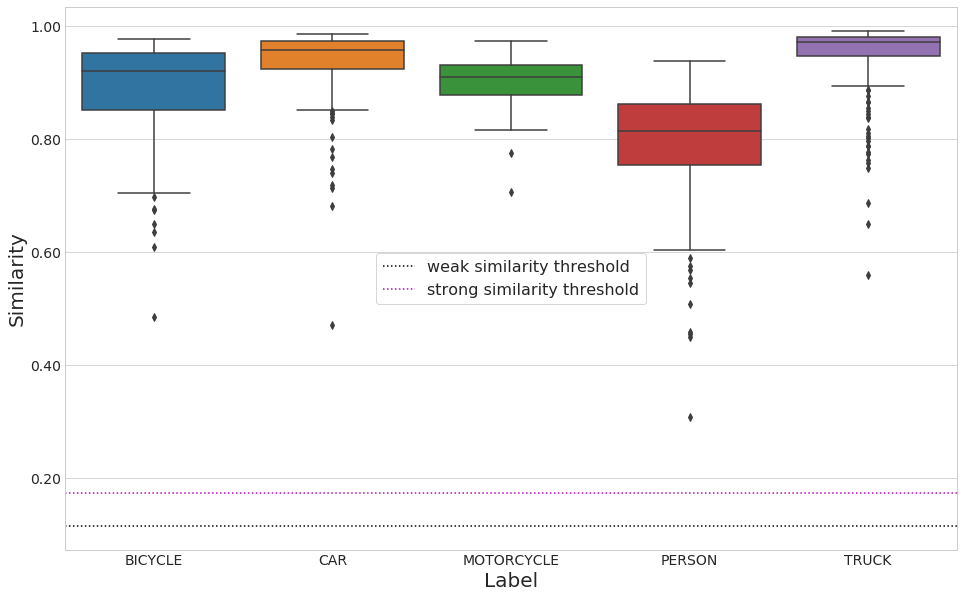

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
fig = plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
ax = sns.boxplot(x='label', y='similarity', data=df)
ax.axhline(2./np.sqrt(300), c='k', ls=':', label='weak similarity threshold')
ax.axhline(3./np.sqrt(300), c='m', ls=':', label='strong similarity threshold')
ax.set_ylabel('Similarity', fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
classes= ['BICYCLE', 'CAR', 'MOTORCYCLE' ,'PERSON', 'TRUCK']
ax.set_xticklabels(classes, fontsize=14)
ax.set_xlabel('Label', fontsize=20)
ax.legend(loc='best', fontsize=16, frameon=True)

In [20]:
hf = h5.File('/media/flo/LACIE_HD/structured_vocabs/traffic_participants_vocab.h5', 'r')

In [22]:
vocab = spa.Vocabulary(dimensions=300)

In [24]:
list(hf.keys())

['classes_visual1', 'vocab_vectors_visual1']

In [25]:
for i in np.arange(5):
    vocab.add(key=classes[i], p=np.array(hf['vocab_vectors_visual1'][i]))

In [27]:
sims = np.zeros((5,5))
for i in np.arange(5):
    for j in np.arange(5):
        sims[i,j] = vocab[classes[i]].compare(vocab[classes[j]])

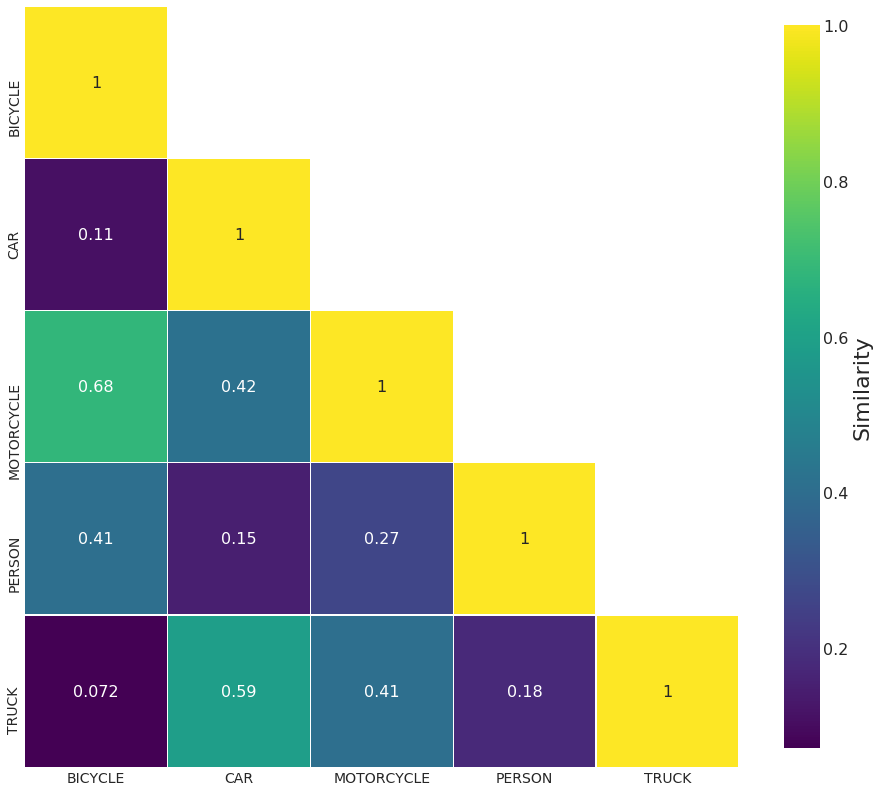

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import cm
mask = np.zeros_like(sims)
mask[np.triu_indices_from(mask, k=1)] = True
fig = plt.figure(figsize=(16,14))
ax = sns.heatmap(sims, mask=mask, annot=True, annot_kws={"size": 16}, 
                 cmap=cm.viridis, linewidths=0.2, 
                 cbar_kws={"label": "Similarity", "shrink":0.95})
ax.figure.axes[-1].yaxis.label.set_size(22)
ax.set_xticklabels(classes, fontsize=14)
ax.set_yticklabels(classes, fontsize=14)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=16)